In [16]:
%matplotlib inline

import os
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import pylab 
import scipy.stats as stats
import itertools

In [2]:
for each in itertools.combinations(range(1,3,1),2):
    print each

(1, 2)


In [3]:
execution_strategy = {
    "ignore_first_n_results": 10,
    "sample_size": 100,
    "type": "sequential",
    "knobs": [
        {"route_random_sigma": 0.0},
        {"route_random_sigma": 0.2},
        {"route_random_sigma": 0.4},
        {"route_random_sigma": 0.6},
    ]
}

In [4]:
a = []
for i in execution_strategy["knobs"]:
    a.append(i["route_random_sigma"])


In [5]:
a

[0.0, 0.2, 0.4, 0.6]

In [17]:
df1 = pd.read_csv("exp1.txt")
df2 = pd.read_csv("exp2.txt")
df1.columns = ["count", "overhead1"]
df2.columns = ["count", "overhead2"]
df = pd.concat([df1, df2["overhead2"]], axis=1)
stats.ttest_ind(df["overhead1"],df["overhead2"], equal_var= False)

Ttest_indResult(statistic=nan, pvalue=nan)

In [7]:
df

,count,overhead1,overhead2
0,1,3.728859,1.082015
1,2,3.075765,1.540377
2,3,1.531744,4.082080
3,4,1.270471,1.838550
4,5,1.173743,2.797368
5,6,2.087414,1.752143
6,7,2.047148,1.200259
7,8,1.193501,2.513710
8,9,1.931994,2.338797
9,10,1.000000,1.940594


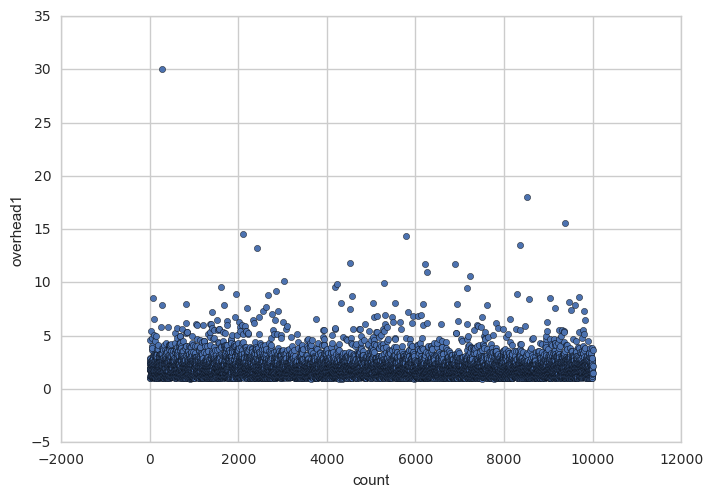

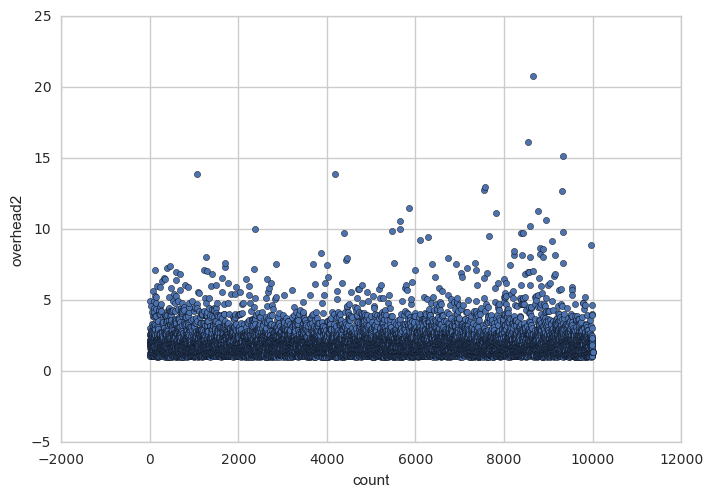

In [40]:
df.plot(kind='scatter',x='count',y='overhead1')
df.plot(kind='scatter',x='count',y='overhead2')

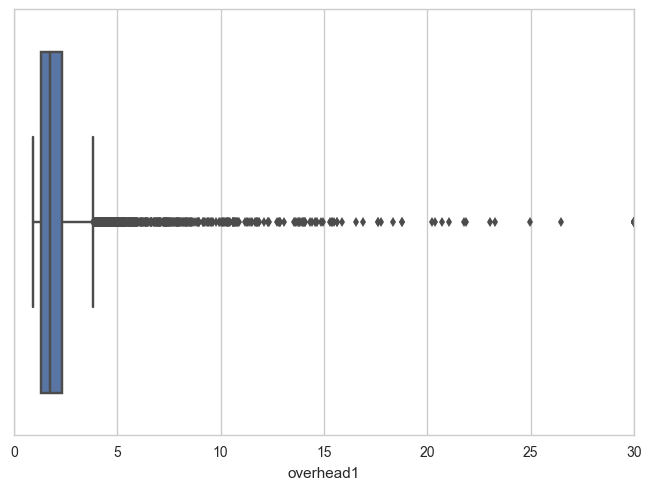

In [8]:
ax = sns.boxplot(x="overhead1", data= df)

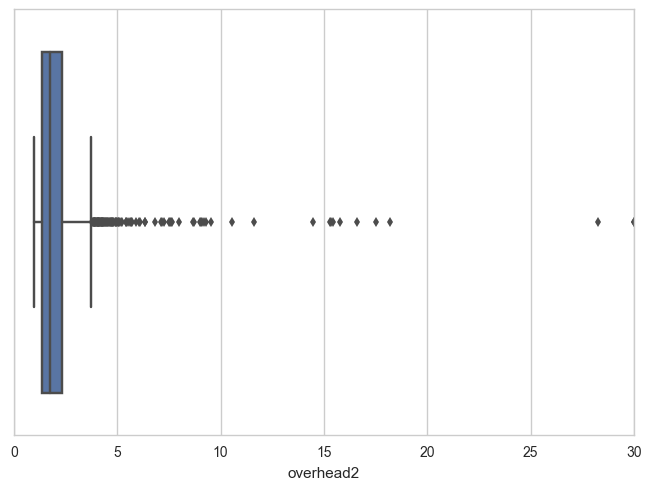

In [9]:
ax = sns.boxplot(x="overhead2", data= df)

KstestResult(statistic=0.84034474606854292, pvalue=0.0)


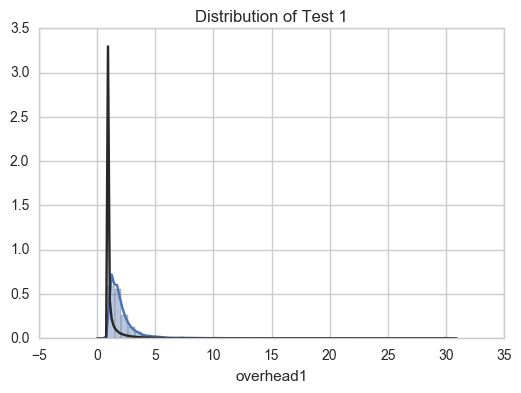

In [40]:
data = df["overhead1"]
ax = plt.axes()
sns.distplot(data, fit=stats.gamma , ax=ax)
ax.set_title("Distribution of Test 1")
print stats.kstest(data, 'norm')

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([  0.90793284,   0.97369524,   0.9880311 , ...,  30.        ,
          30.        ,  30.        ])),
 (1.3025113725469251, 2.1891763915229703, 0.67808189651936357))

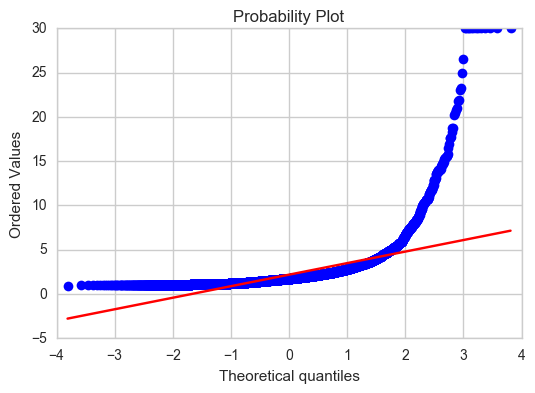

In [18]:
stats.probplot(df["overhead1"], dist="norm", plot=plt)

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]),
  array([  0.97449696,   0.97870317,   0.98533408, ...,  15.15848365,
          16.14710301,  20.77342164])),
 (0.89004424542316929, 2.0265771103204271, 0.8473072332386129))

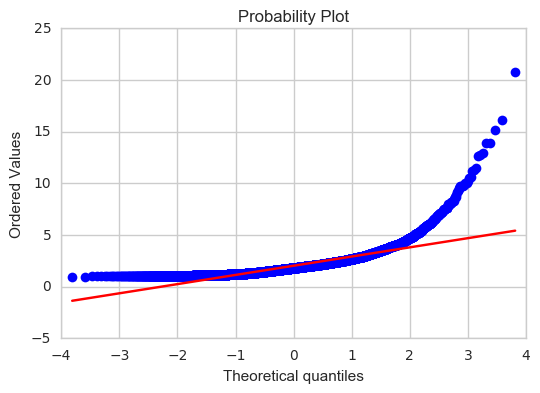

In [53]:
stats.probplot(df["overhead2"], dist="norm", plot=plt)

In [58]:
overhead1 = np.asarray(df["overhead1"])
overhead2 = np.asarray(df["overhead2"])

In [59]:
np.var(overhead1), np.var(overhead2)

(1.0721372537879432, 1.1026319390965296)

In [60]:
np.mean(overhead1), np.mean(overhead2)

(2.0036884947202687, 2.0265771103204275)